# `morphon` usage examples

## Displaying cells

### Simple plot

Load morphology file [in.swc](./in.swc)

In [1]:
from morphon import Morpho, plot
m = Morpho('in.swc')

Plot (x, y) coordinates of morphological data.

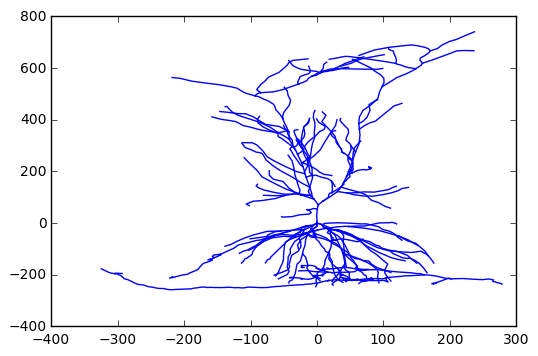

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
plot(m, ax)

### Simple 3D plot

In [3]:
from morphon import Morpho
m = Morpho('in.swc')

In [4]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


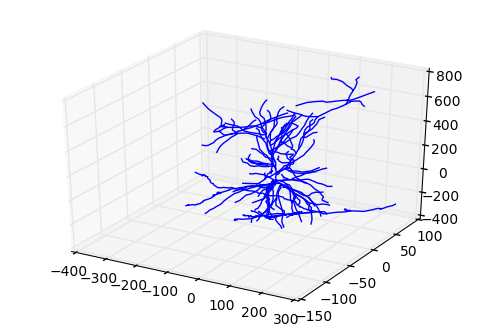

In [5]:
from morphon import plot
fig = plt.figure()
ax = fig.gca(projection='3d')
plot(m, ax, projection='3d')

### Plotting neurites

In [6]:
from morphon import Morpho, plot
m = Morpho('in.swc')

In [7]:
neurites = set(m.neurite(i) for i in m.points())
colors = {'soma': 'black', 'dend': 'blue', 'apic': 'green', 'axon': 'red'}
thickness = {'soma': 5, 'dend': 1, 'apic': 1, 'axon': 0.5}

In [8]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

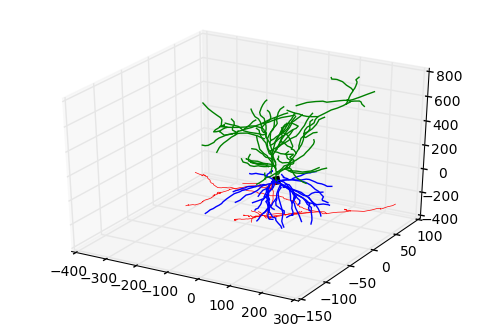

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')

for neurite in neurites:
    plot(m, ax, projection='3d', 
         neurites=[neurite], 
         color=colors[neurite], 
         linewidth=thickness[neurite])

### Plotting 2D projections

In [10]:
from morphon import Morpho, plot
m = Morpho('in.swc')

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

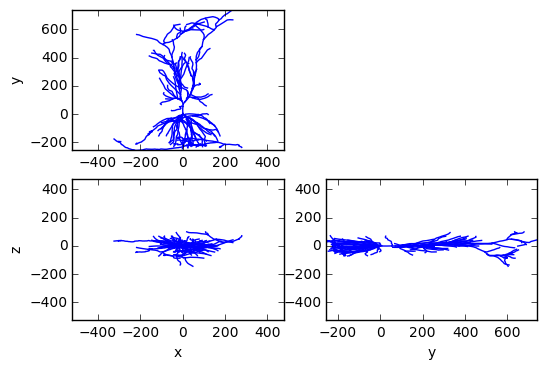

In [12]:
fig = plt.figure()
ax = plt.subplot(2, 2, 1)
ax.set_ylabel('y')
plot(m, ax, projection='xy', equal_scales=True)
ax = plt.subplot(2, 2, 3)
ax.set_ylabel('z')
ax.set_xlabel('x')
plot(m, ax, projection='xz', equal_scales=True)
ax = plt.subplot(2, 2, 4)
ax.set_xlabel('y')
plot(m, ax, projection='yz', equal_scales=True)

## Morphometric analysis

### Measuring morphological features

### Analysing neurites

### Scholl analysis

In [13]:
from morphon import Morpho, scholl
m = Morpho('in.swc')
neurites = set(m.neurite(i) for i in m.points())

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

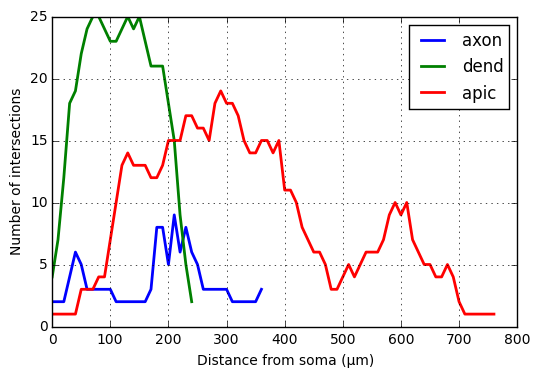

In [15]:
fig, ax = plt.subplots()
ax.set_xlabel(u'Distance from soma (μm)')
ax.set_ylabel('Number of intersections')
for neurite in neurites:
    if neurite is 'soma': continue
    r, x = scholl(m, neurite, h=10)
    plt.plot(r, x, label=neurite, lw=2)
plt.legend()
plt.grid(True)

### Collecting feature statistsics

## Manipulating morphologies

### Create simple morphology

### Clone morphology

### Neurites pruning

### Editing morphology

### Assembling new morphology from pools of neurites

...

In [16]:
import morphon

Load morphology file [in.swc](./in.swc)

In [17]:
m = morphon.Morpho('in.swc')

Do basic morphometric analysis of the whole cell.

In [18]:
metrics = morphon.measure(m)

In [19]:
import json
print json.dumps(metrics, indent=4, sort_keys=True)

{
    "area": 17769.394872308891, 
    "bifurcation_angle": [
        1.1133524244246431, 
        0.65654608912431689, 
        0.1691353959724157, 
        2.9987570302548723
    ], 
    "center": [
        0.0, 
        0.0, 
        0.0
    ], 
    "curvature": [
        0.05432465047785557, 
        0.12868671956671554, 
        0.0, 
        2.8222230350095341
    ], 
    "degree": [
        1, 
        128
    ], 
    "effective_diameter": 0.36277303794727778, 
    "euclidean_extent": [
        603.13, 
        998.26999999999998, 
        244.43000000000001
    ], 
    "length": 15591.4951435324, 
    "local_diameter": [
        0.34188848758465007, 
        0.63578418128497416, 
        0.29999999999999999, 
        13.5566
    ], 
    "number_of_bifurcations": 119, 
    "number_of_branches": 248, 
    "number_of_stems": 3, 
    "number_of_tips": 128, 
    "order": [
        1, 
        23
    ], 
    "path_extent": 885.80728910592359, 
    "radial_extent": 778.79146958605031,

Plot the cell.

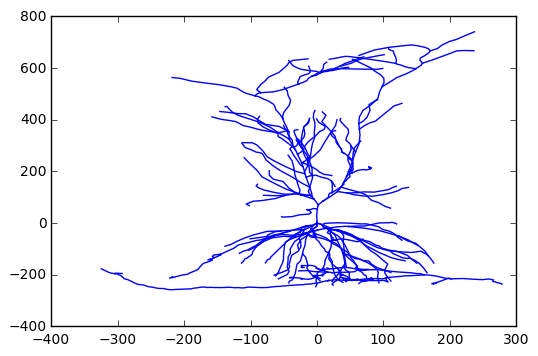

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot()
morphon.plot(m, ax)

Plot cell projections.

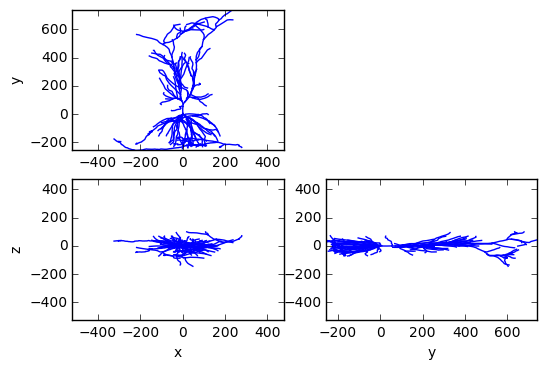

In [21]:
fig = plt.figure()
ax = plt.subplot(2, 2, 1)
ax.set_ylabel('y')
morphon.plot(m, ax, projection='xy', equal_scales=True)
ax = plt.subplot(2, 2, 3)
ax.set_ylabel('z')
ax.set_xlabel('x')
morphon.plot(m, ax, projection='xz', equal_scales=True)
ax = plt.subplot(2, 2, 4)
ax.set_xlabel('y')
morphon.plot(m, ax, projection='yz', equal_scales=True)

Make a colorful plot to distinguish different types of neurites.

In [22]:
neurites = set(m.neurite(i) for i in m.traverse())
colors = {'soma': 'black', 'dend': 'blue', 'apic': 'green', 'axon': 'red'}
thickness = {'soma': 5, 'dend': 1, 'apic': 1, 'axon': 0.5}

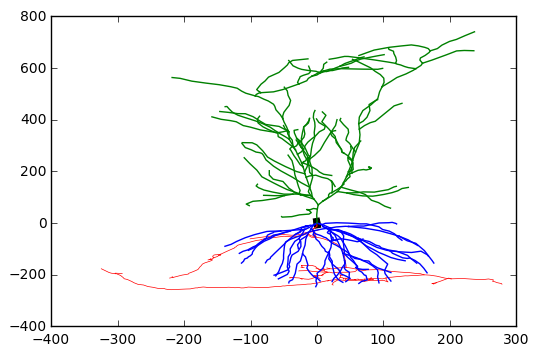

In [23]:
fig = plt.figure()
ax = plt.subplot()

for neurite in neurites:
    morphon.plot(m, ax, neurites=[neurite], 
                 color=colors[neurite], 
                 linewidth=thickness[neurite])

Do the same in 3D.

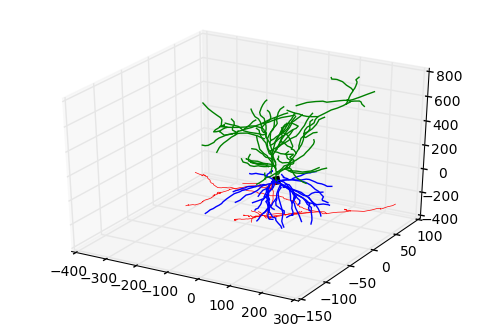

In [24]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

for neurite in neurites:
    morphon.plot(m, ax, projection='3d',
                 neurites=[neurite], 
                 color=colors[neurite], 
                 linewidth=thickness[neurite])

Build the Scholl diagram.

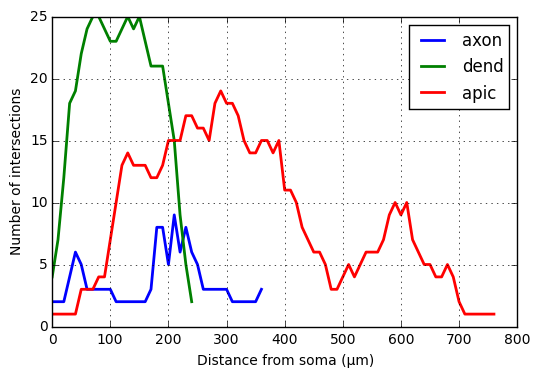

In [25]:
fig = plt.figure()
ax = plt.subplot()
ax.set_xlabel(u'Distance from soma (μm)')
ax.set_ylabel('Number of intersections')
for neurite in neurites:
    if neurite is 'soma': continue
    r, x = morphon.scholl(m, neurite, h=10)
    plt.plot(r, x, label=neurite, lw=2)
plt.legend()
plt.grid(True)

There is a set of primitives for manipulating morphology trees, e.g. to copy, prune or graft individual branches. Below is an example of pruning random subtrees, shown in red.

In [26]:
import random

n = m.copy()
branch_starts = [b[0] for b in n.branches()]
for repetition in range(5):
    b = random.choice(branch_starts)
    i = branch_starts.index(b)
    branch_starts.pop(i)
    n.prune(b) 

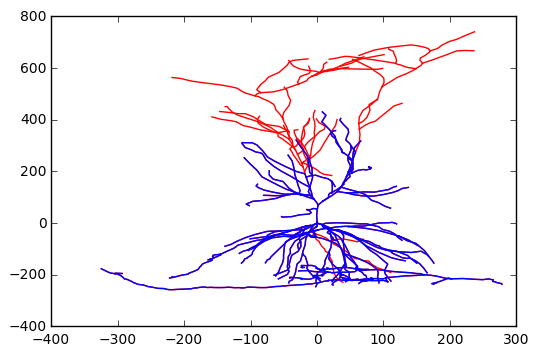

In [27]:
fig, ax = plt.subplots()
morphon.plot(m, ax, color='red')
morphon.plot(n, ax)

...

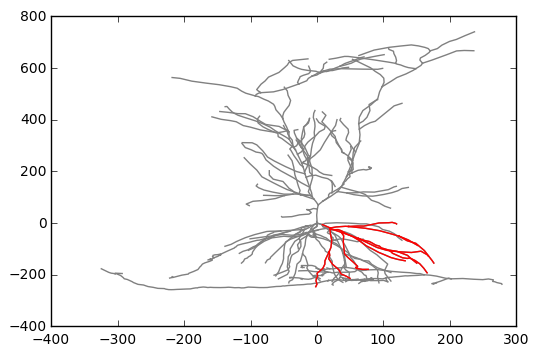

In [28]:
subtree = m.copy(553)
fig, ax = plt.subplots()
morphon.plot(m, ax, color='grey')
morphon.plot(subtree, ax, color='red')

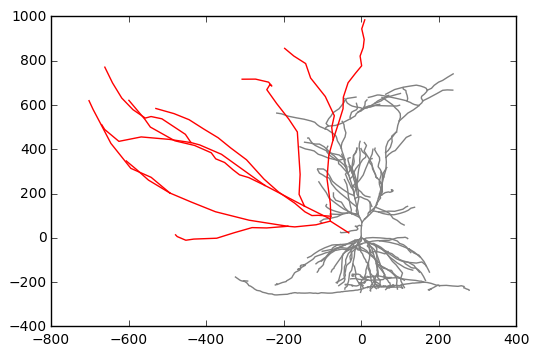

In [29]:
subtree.rotate((0,0,1), 3.14)
subtree.scale(4)
fig, ax = plt.subplots()
morphon.plot(m, ax, color='grey')
morphon.plot(subtree, ax, color='red')

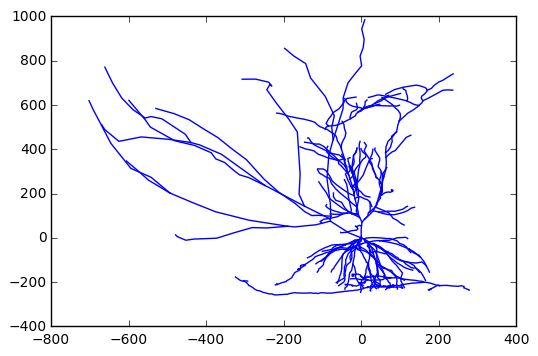

In [30]:
m.graft(m.root(), subtree)
fig, ax = plt.subplots()
morphon.plot(m, ax)